In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
# Exploratory data analysis

In [4]:
df.shape

(32560, 15)

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


the value 15024 in Capital_gain seems to be weird value

In [7]:
list(df.columns)

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

Age:

Represents the age of the individual.

Workclass:

Describes the type of employment or work situation, such as private, self-employed, government, etc.

Fnlwgt:

Stands for "final weight." It is an adjusted weight assigned to each individual to make the sample more representative of the total population.

Education:

Indicates the highest level of education attained by the individual.

Education_num:

Represents a numerical coding of the education level for computational purposes.

Marital_status:

Describes the marital status of the individual, such as married, single, divorced, etc.

Occupation:

Specifies the type of occupation or job the individual is engaged in.

Relationship:

Represents the individual's role in the family or relationship status.

Race:

Indicates the race or ethnic background of the individual.

Sex:

Represents the gender of the individual.

Capital_gain:

Reflects the capital gains reported by the individual.any financial gains individuals have made from the sale of capital assets (e.g., stocks, real estate) during the specified time period covered by the dataset. It could represent additional income beyond regular wages, such as profits from investments.

Capital_loss:

Reflects the capital losses reported by the individual.any financial losses individuals have incurred from the sale of capital assets during the specified time period. It indicates a decrease in the value of their investments, which may offset some of the gains for tax purposes.

Hours_per_week:

Represents the average number of hours worked per week.

Native_country:

Indicates the country of origin or citizenship.

Income:
 a binary classification indicating whether the individual's income is above or below a certain threshold.

independent variables:
'Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country'.
 
 Dependent variables: 'Income'


In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Education_num will be removed as it is just the coding of Education

In [9]:
df.drop('Education_num', axis = 1, inplace = True)

In [10]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
# checking the number of zeros in Capital_gain and loss

In [12]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

Capital_gain is majoritarily filled with 0 value. we will drop the column

In [13]:
df.drop('Capital_gain', axis = 1, inplace = True)

In [14]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

Capital_loss is majoritarily filled with 0 value. we will drop the column

In [15]:
df.drop('Capital_loss', axis = 1, inplace = True)

In [16]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing data

In [17]:
d = df.loc[df.duplicated(),]

In [18]:
d

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,Never-married,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
5103,90,Private,52386,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
9170,21,Private,250051,Some-college,Never-married,Prof-specialty,Own-child,White,Female,10,United-States,<=50K
11630,20,Private,107658,Some-college,Never-married,Tech-support,Not-in-family,White,Female,10,United-States,<=50K
13083,25,Private,195994,1st-4th,Never-married,Priv-house-serv,Not-in-family,White,Female,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
18554,30,Private,144593,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,40,?,<=50K
18697,19,Private,97261,HS-grad,Never-married,Farming-fishing,Not-in-family,White,Male,40,United-States,<=50K
21317,19,Private,138153,Some-college,Never-married,Adm-clerical,Own-child,White,Female,10,United-States,<=50K


In [19]:
len(d)

26

In [20]:
print('data loss in %: ', 100 - (df.shape[0]-d.shape[0])/df.shape[0]*100)

data loss in %:  0.07985257985258443


In [21]:
#removing duplicates 

In [22]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [23]:
# summary statistics of df and first look into outliers

In [24]:
df.describe()

,Age,Fnlwgt,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000
mean,38.581634,1.897818e+05,40.437469
std,13.640642,1.055498e+05,12.347618
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.178315e+05,40.000000
50%,37.000000,1.783630e+05,40.000000
75%,48.000000,2.370545e+05,45.000000
max,90.000000,1.484705e+06,99.000000


In [25]:
def box(columns, data, a, b, c, d):
    plt.figure(figsize = (10, 3), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

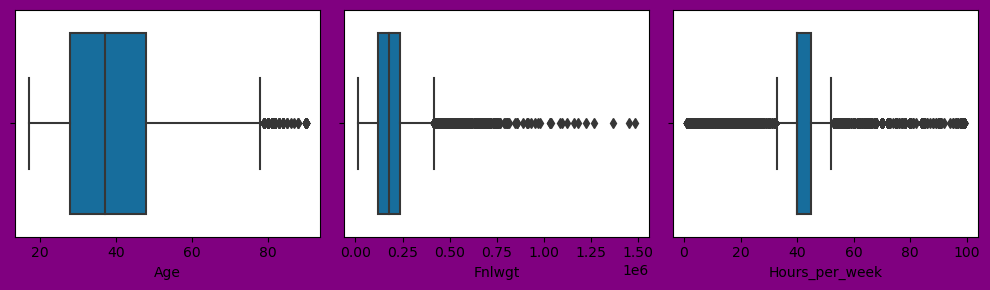

In [26]:
col = ['Age', 'Fnlwgt', 'Hours_per_week']
box(col, df,3, 1, 3, 10)

In [27]:
df[col].skew()

Age               0.558738
Fnlwgt            1.446972
Hours_per_week    0.227636
dtype: float64

In [28]:
df.Fnlwgt.nunique()

21647

In [29]:
df.Fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

the high number of values in the column Fnlwgt shows there is a high diversity in demographic carateristics. so this column is not that much important for modelling (we could have use this column if it showed clusters of demographic carateristics)

In [30]:
df.drop('Fnlwgt', axis = 1, inplace = True)

In [31]:
cl = ['Age', 'Hours_per_week']

In [32]:
df[cl].skew()

Age               0.558738
Hours_per_week    0.227636
dtype: float64

In [33]:
# data analytics

In [34]:
l = df.drop(['Age','Income'], axis = 1)

In [35]:
#Q1: what are the variables that significantly influence income repartition?

for i in l.columns:
    print(df.groupby(i)['Income'].value_counts())
    print('\n')




Workclass          Income
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      944
                    >50K       353
 Without-pay        <=50K       14
Name: Income, dtype: int64


Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9t

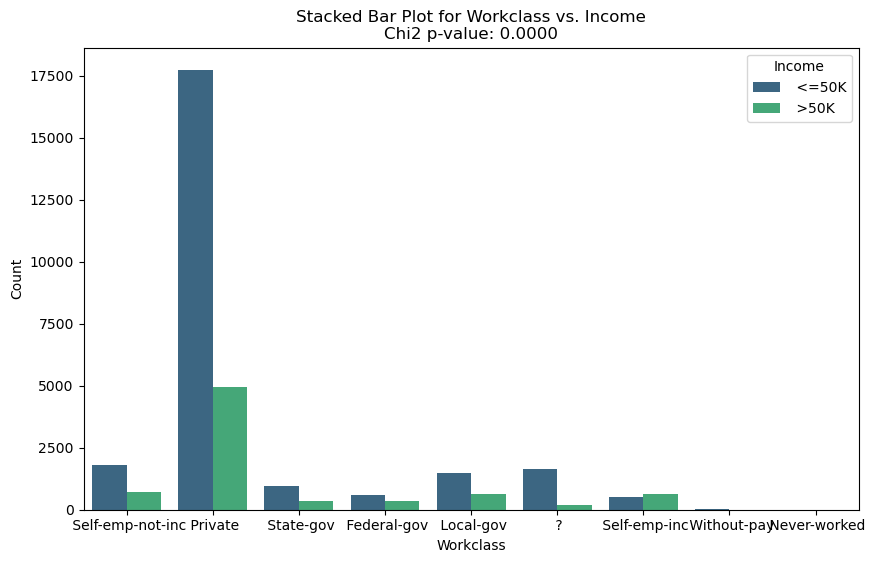

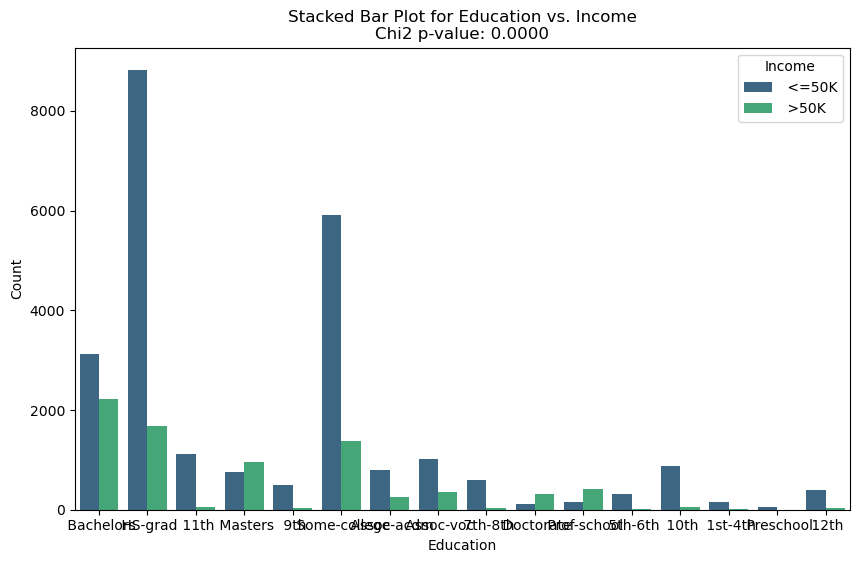

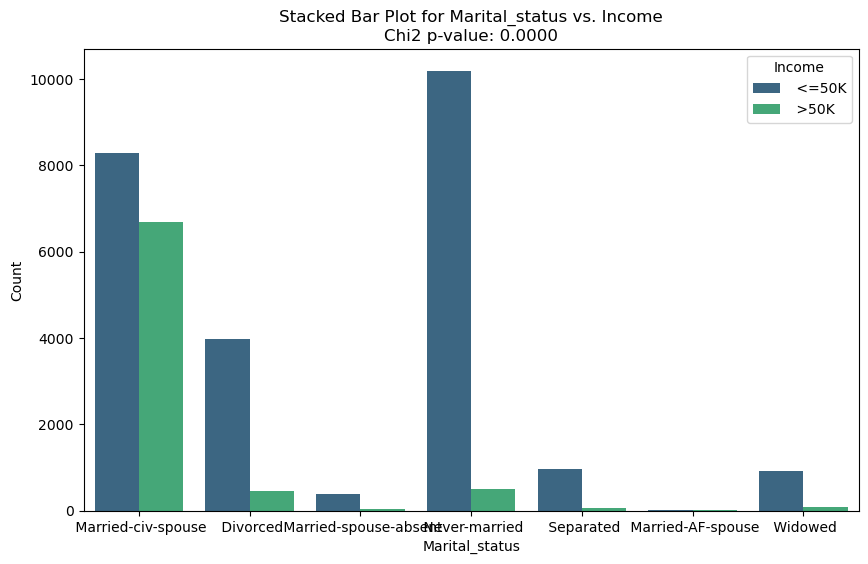

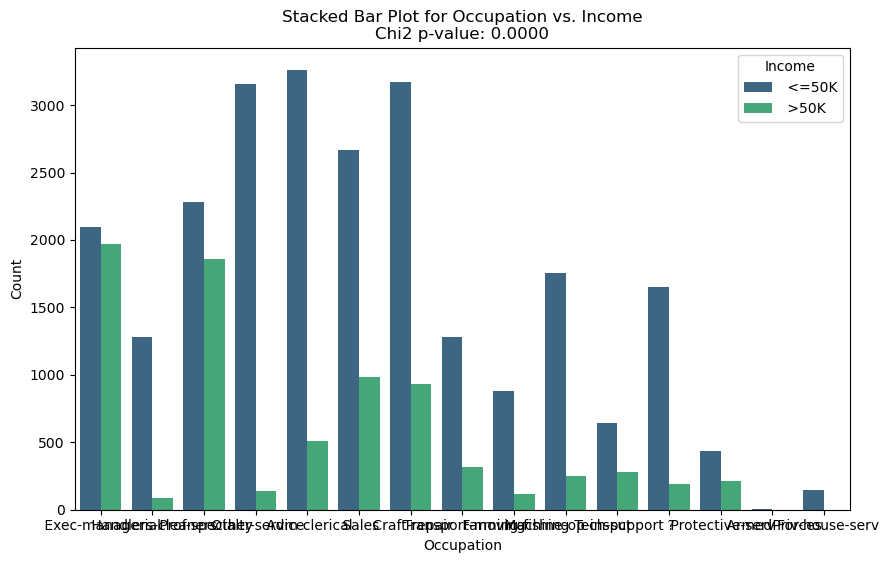

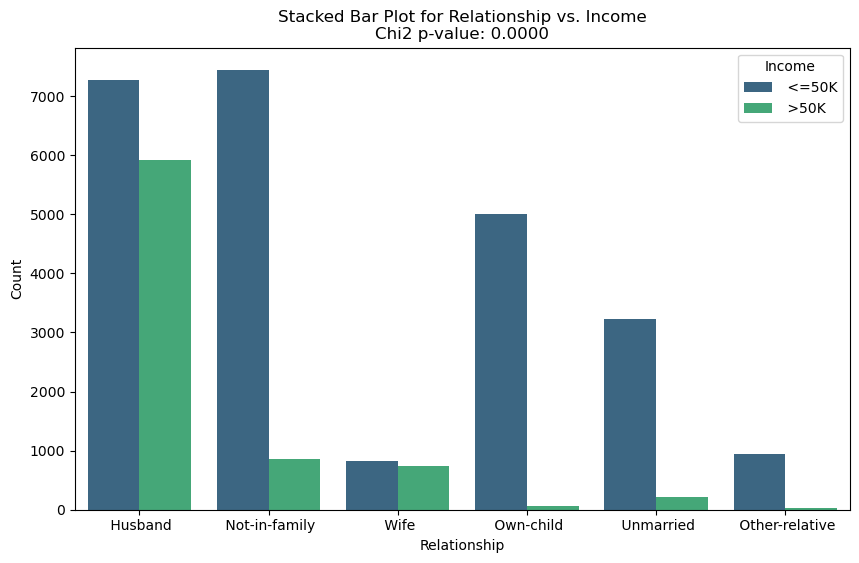

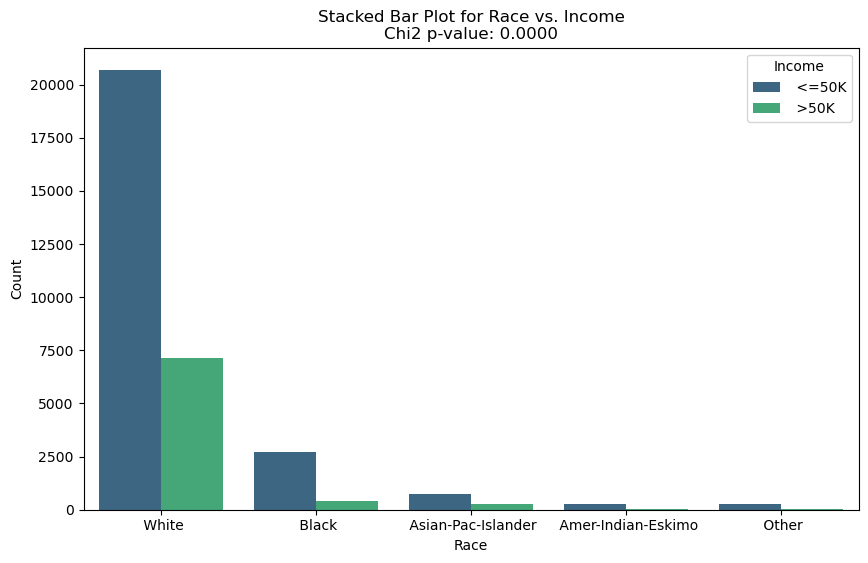

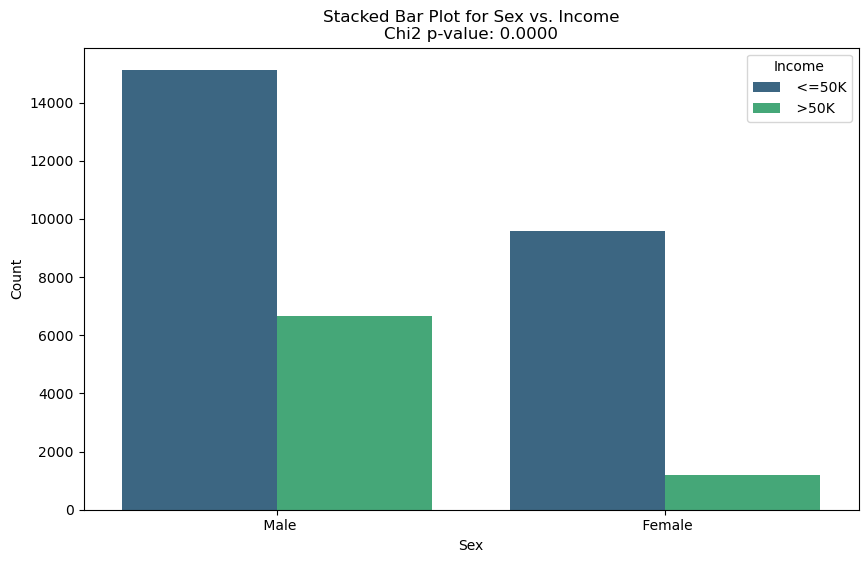

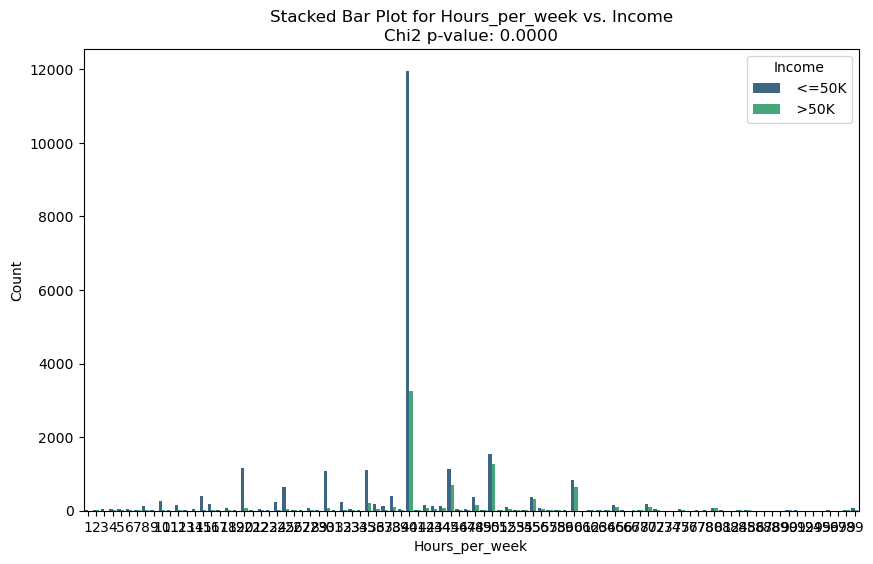

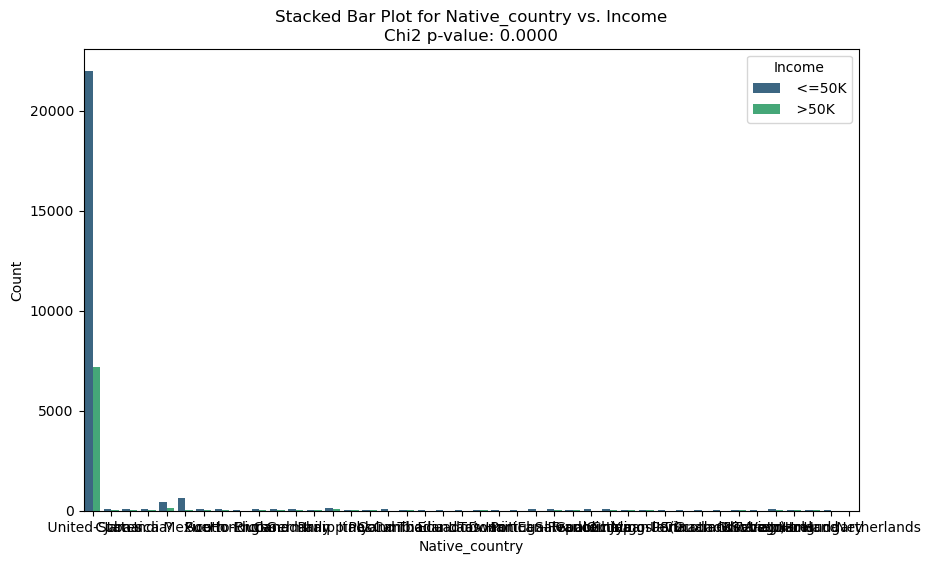

In [36]:
from scipy.stats import chi2_contingency

selected_columns = [
    'Workclass', 'Education', 'Marital_status',
    'Occupation', 'Relationship', 'Race', 'Sex',
     'Hours_per_week', 'Native_country', 'Income'
]



# Loop through selected columns and create stacked bar plots
for column in selected_columns:
    if column != 'Income':  # Skip the target variable
        contingency_table = pd.crosstab(df[column], df['Income'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Create a stacked bar plot
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Income', data=df, palette='viridis')
        plt.title(f'Stacked Bar Plot for {column} vs. Income\nChi2 p-value: {p:.4f}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Income', loc='upper right')
        plt.show()


In [37]:

from scipy.stats import chi2_contingency


# Significance level
alpha = 0.05

# Loop through selected columns and perform chi-square tests
for column in selected_columns:
    if column != 'Income':  # Skip the target variable
        contingency_table = pd.crosstab(df[column], df['Income'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        print(f"Chi-square test for {column} vs. Income:")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p}")

        # Interpretation based on p-value
        if p < alpha:
            print(f"The variables {column} and Income are associated (p-value < {alpha})")
        else:
            print(f"The variables {column} and Income are not associated (p-value >= {alpha})")
        
        print("")


Chi-square test for Workclass vs. Income:
Chi2 value: 1045.774332128712
P-value: 1.9613536197342886e-220
The variables Workclass and Income are associated (p-value < 0.05)

Chi-square test for Education vs. Income:
Chi2 value: 4430.1842949937545
P-value: 0.0
The variables Education and Income are associated (p-value < 0.05)

Chi-square test for Marital_status vs. Income:
Chi2 value: 6517.299336300969
P-value: 0.0
The variables Marital_status and Income are associated (p-value < 0.05)

Chi-square test for Occupation vs. Income:
Chi2 value: 4031.6714838660523
P-value: 0.0
The variables Occupation and Income are associated (p-value < 0.05)

Chi-square test for Relationship vs. Income:
Chi2 value: 6698.677336364784
P-value: 0.0
The variables Relationship and Income are associated (p-value < 0.05)

Chi-square test for Race vs. Income:
Chi2 value: 330.9543813722895
P-value: 2.2673780743416745e-70
The variables Race and Income are associated (p-value < 0.05)

Chi-square test for Sex vs. Incom

In [38]:
#Q2: is there any gender gap in Income?


In [39]:


gender_income_table = pd.crosstab(df['Sex'], df['Income'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(gender_income_table)

# Print the results
print(f"Chi-square test for Gender vs. Income:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

# Interpretation based on p-value
alpha = 0.05
if p < alpha:
    print(f"There is a significant association between Gender and Income (p-value < {alpha})")
    
    # Correctly identifying the label for higher income
    higher_income_label = ' >50K'

    # Calculate the proportions of each gender in the higher income group
    male_high_income_proportion = gender_income_table.loc[' Male', higher_income_label] / gender_income_table.loc[' Male'].sum()
    female_high_income_proportion = gender_income_table.loc[' Female', higher_income_label] / gender_income_table.loc[' Female'].sum()

    # Compare proportions
    if male_high_income_proportion > female_high_income_proportion:
        print("Males have a higher proportion of individuals with income >50K.")
    elif male_high_income_proportion < female_high_income_proportion:
        print("Females have a higher proportion of individuals with income >50K.")
    else:
        print("Males and females have an equal proportion of individuals with income >50K.")
else:
    print(f"There is no significant association between Gender and Income (p-value >= {alpha})")


Chi-square test for Gender vs. Income:
Chi2 value: 1517.9756145144036
P-value: 0.0
There is a significant association between Gender and Income (p-value < 0.05)
Males have a higher proportion of individuals with income >50K.


In [40]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df:
    if df[column].dtypes == 'object':  
        df[column] = encoder.fit_transform(df[column].values.reshape(-1,1))


df

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,9.0,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,11.0,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,1.0,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
3,28,4.0,9.0,2.0,10.0,5.0,2.0,0.0,40,5.0,0.0
4,37,4.0,12.0,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,7.0,2.0,13.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,11.0,6.0,1.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,11.0,4.0,1.0,3.0,4.0,1.0,20,39.0,0.0


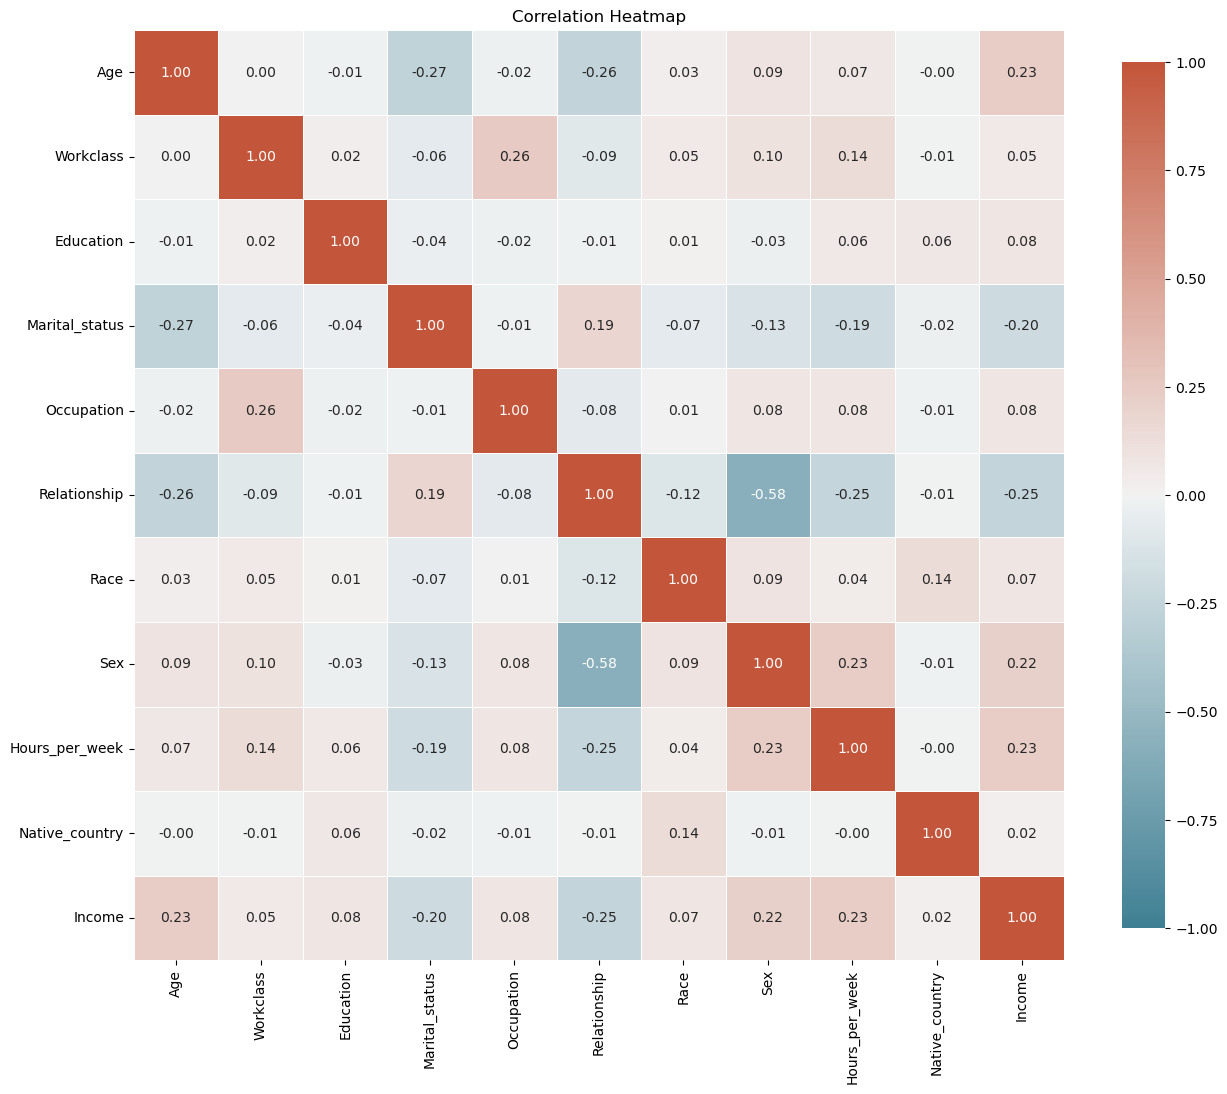

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

there is no multivolinearity

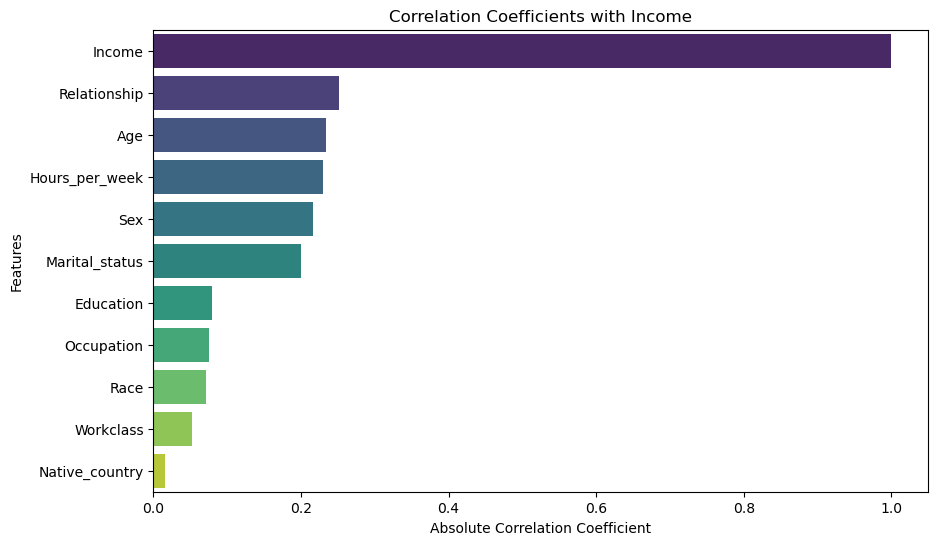

In [42]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlations with the target variable
corr_with_target = corr_matrix['Income'].abs()

# Sort the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Create a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Income")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

the correlation of Native_country with Income is negligible. we will drop this column

In [43]:
df.drop('Native_country', axis = 1, inplace = True)

In [44]:
# seprating features and target

x = df.drop('Income', axis =1)
y = df['Income']

In [45]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x, y)


In [47]:
Y.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

In [48]:
x=X
y=Y

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

         Variable       VIF
0             Age  1.138058
1       Workclass  1.079604
2       Education  1.007804
3  Marital_status  1.123831
4      Occupation  1.064749
5    Relationship  1.988238
6            Race  1.020131
7             Sex  1.865484
8  Hours_per_week  1.140658


# modelling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define classifier
clf = RandomForestClassifier()

# Define parameters for grid search
param_grid = {'random_state': range(1, 101)}

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best random state
best_random_state = grid_search.best_params_['random_state']
print(f"Best Random State: {best_random_state}")"""

'x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)\n\n# Define classifier\nclf = RandomForestClassifier()\n\n# Define parameters for grid search\nparam_grid = {\'random_state\': range(1, 101)}\n\n# Perform grid search\ngrid_search = GridSearchCV(clf, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(x_train, y_train)\n\n# Get the best random state\nbest_random_state = grid_search.best_params_[\'random_state\']\nprint(f"Best Random State: {best_random_state}")'

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=72)

In [53]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    pred_train = model.predict(x_train)
    print('accuracy_score on training data: ', accuracy_score(y_train, pred_train))
    score = cross_val_score(model,x,y)
    print(accuracy_score(y_test, pred_model))
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')

accuracy_score on training data:  0.7208587302443498
0.7203074433656957
[[4088 2118]
 [1339 4815]]
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      6206
         1.0       0.69      0.78      0.74      6154

    accuracy                           0.72     12360
   macro avg       0.72      0.72      0.72     12360
weighted avg       0.72      0.72      0.72     12360

[0.71065939 0.71703074 0.72532362 0.7202387  0.7266107 ]
0.7199726304489927
The difference between accuracy score and cross validation score of  LogisticRegression() is:  0.00033481291670300894


accuracy_score on training data:  0.973002858838125
0.8758899676375405
[[5393  813]
 [ 721 5433]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      6206
         1.0       0.87      0.88      0.88      6154

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted

among the models with high training accuracy, SVC has the least difference between accuracy score and cross validation score. RandomForestClassifier has the highest training accuracy and the highest precision. let's hypertune both and see which better generalises

In [54]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV


param_grid = {'C':[0.5,1.0],
             'random_state':[10,50],
             'degree':[0,2],
             'max_iter':[0,1],
             'coef0':[0.0,0.1]}
GV = GridSearchCV(SVC(), param_grid, cv=5)
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1.0], 'coef0': [0.0, 0.1], 'degree': [0, 2],
                         'max_iter': [0, 1], 'random_state': [10, 50]})

In [55]:
GV.best_params_

{'C': 0.5, 'coef0': 0.0, 'degree': 0, 'max_iter': 1, 'random_state': 10}

In [56]:
my_model = SVC(C=0.5, degree=0, coef0=0,max_iter=1, random_state=20)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 



Acuuracy Score= 52.98543689320388


This model generalizes poorly


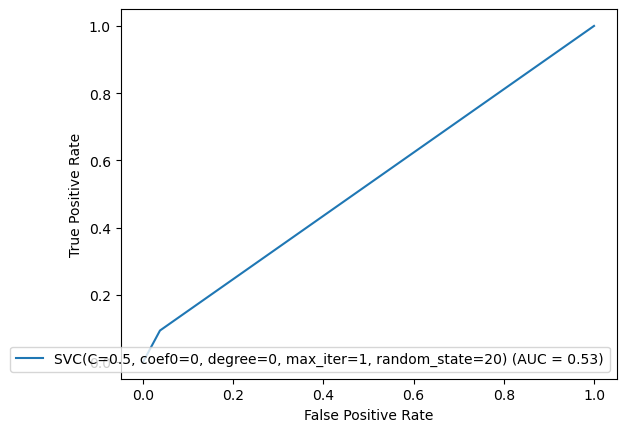

In [58]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [59]:
param_grid = {
    'n_estimators': [10, 30],        # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]          # Minimum number of samples required to be at a leaf node
}

S = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
S.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 30]})

In [ ]:
S.best_params_

In [61]:
my_mod =RandomForestClassifier(min_samples_leaf=1, min_samples_split=5,max_depth=20, n_estimators=30)
my_mod.fit(x_train, y_train)
pred = my_mod.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 



Acuuracy Score= 88.23624595469256


RandomForestClassifier generalizes well. so this our best model

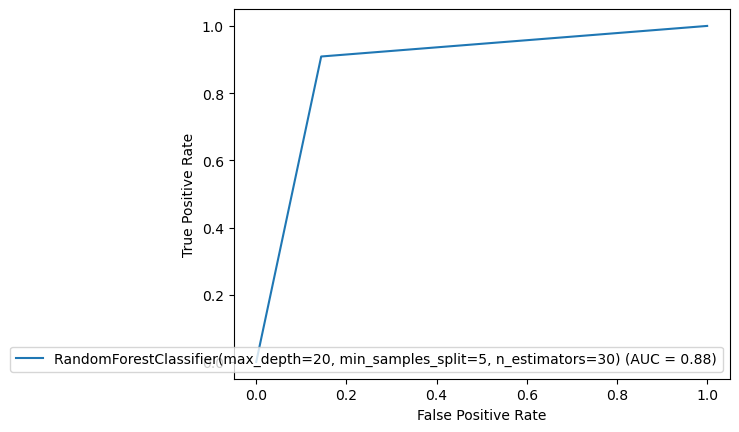

In [62]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_mod)
display.plot()
plt.show()

In [ ]:
pickle.dump(my_mod, open('Census_Romuald.pkl', 'wb'))

In [ ]:
# recommendation 

Further Considerations:

- It would be helpful to examine feature importances from the RandomForest model to understand which features contribute the most to the predictions. This information can provide insights into the importance of different features in determining income levels.
- further analysis the Fnlwgt column to see if it has an importance for predictions 
- model evaluation is an ongoing process, and it's beneficial to iterate and refine the models based on new insights or changes in the data.